# Assignment 04: Control Charts for Variables I
Sydney Perrin

February 3rd, 2022

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

## Import Data

In [2]:
df=pd.read_csv('04 data.csv').dropna()
#df.head(100)

## 1. A high-voltage power supply should have a nominal output voltage of 350 V. A sample of four units is selected each day and tested for process-control purposes. Set up X-bar and R charts on this process. Is the process in statistical control?
ANS: See X-bar and R charts in the code below. Yes, the process is in statistical control because there are no points out of bounds in the control charts.

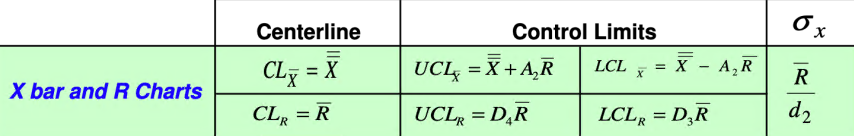

### R Chart Calculations

In [3]:
m=20 # Number of samples
n=4 # Sample Size

Rvalues = df.groupby(['Sample Number']).Voltage.max()-df.groupby(['Sample Number']).Voltage.min()
Rbar = np.mean(Rvalues)
CL_R = Rbar 

# Control chart constants for n=4
D4 = 2.282
D3 = 0
A2 = 0.729
d2 = 2.059

UCL_R = D4*Rbar
LCL_R = D3*Rbar #0

print('CL_R=', CL_R)
print('UCL_R=', UCL_R)
print('LCL_R=', LCL_R)

CL_R= 0.6250000000000057
UCL_R= 1.426250000000013
LCL_R= 0.0


### Plot R Chart

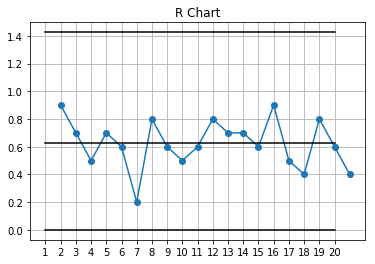

In [4]:
m=20
ucl_line = np.full(m,UCL_R) 
lcl_line = np.full(m,LCL_R) 
cl_line = np.full(m,CL_R)
plt.plot(Rvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('R Chart')
plt.show()

# There are no points out of bounds.

### X-bar Chart Calculations

In [5]:
xbarvalues = df.groupby(['Sample Number']).Voltage.mean()
xbarbar = np.mean(xbarvalues)
CL_X = xbarbar
UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('CL_X=', CL_X)
print('UCL_X=', UCL_X)
print('LCL_X=', LCL_X)

CL_X= 351.0325
UCL_X= 351.488125
LCL_X= 350.57687500000003


### Plot X-bar Chart

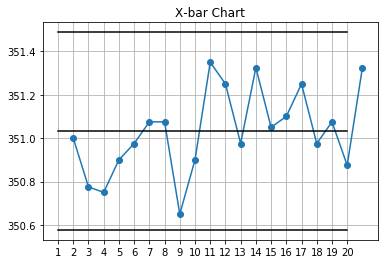

In [6]:
m=20
ucl_line = np.full(m,UCL_X) 
lcl_line = np.full(m,LCL_X) 
cl_line = np.full(m,CL_X)
plt.plot(xbarvalues,marker="o")
plt.plot(ucl_line,color='k')
plt.plot(lcl_line,color='k')
plt.plot(cl_line,color='k')

labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 

plt.grid(True)
plt.title('X-bar Chart')
plt.show()

# There are no points out of bounds.

## 2. What is the estimate of the standard deviation?
ANS: The estimate of the standard deviation is sigma=0.304

In [7]:
sigma = Rbar/d2
print('sigma =',sigma)

sigma = 0.30354541039339755


## 3. Is there evidence to support the claim that voltage is normally distributed?
ANS: Yes, there is evidence to support the claim that voltage is normally distributed. Graphically, the data approximately follows a normal distribution plat as shown by the probability plot below. Statistically, the p-value of the data from the normal test is 0.196 > 0.05.

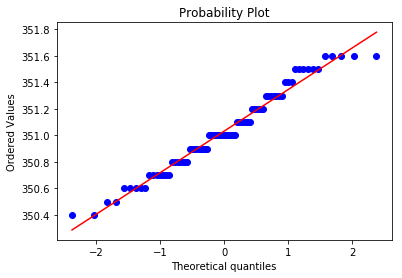

NormaltestResult(statistic=3.2547388951156324, pvalue=0.19644565563876693)


In [8]:
x=df['Voltage']

# Graphic test
stat.probplot(x, plot=plt)
plt.show() 

# Stats tests
t1=stat.shapiro(x)
t2=stat.normaltest(x)
#print(t1)
print(t2) # Using the normal test results.

## 4. Supposing the process was out-of-control, and after deleting the points lying out of the bounds in the R chart, the new (in-control) R-bar is 0.56. What would be the new values for the UCL and LCL in the R chart?
ANS: The new values are UCL=1.28 and LCL=0

In [9]:
Rbar=0.56
CL_R=Rbar
UCL_R=D4*Rbar
LCL_R=D3*Rbar

print('CL_R=', CL_R)
print('UCL_R=',UCL_R)
print('LCL_R=',LCL_R)

CL_R= 0.56
UCL_R= 1.2779200000000002
LCL_R= 0.0


## 5. Supposing the process was out-of-control, and after deleting the points lying out of the bounds in the R chart, the new (in-control) R-bar is 0.56. What would be the new values for the CL, UCL and LCL in the X-bar chart?

In [10]:
Rbar=0.56
CL_X = xbarbar # Not told which points are removed. Assume keep original CL_X=xbarbar
UCL_X = xbarbar + A2*Rbar
LCL_X = xbarbar - A2*Rbar

print('CL_X=', CL_X)
print('UCL_X=', UCL_X)
print('LCL_X=', LCL_X)

CL_X= 351.0325
UCL_X= 351.44074
LCL_X= 350.62426000000005


## 6. Assume that the process mean shifts to a value that is 1.5 times the value of sigma. What is the probability that we will still assume that the previous value of mean is the correct one?
ANS: The probability is 0.495

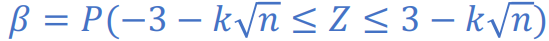

In [11]:
k=1.5
dof = n-1
beta = stat.t.cdf(3-k*np.sqrt(n), dof) - stat.t.cdf(-3-k*np.sqrt(n), dof)
print('probability=', beta)

probability= 0.4953636425538577


## 7. What is the Average Run Length (ARL) for this process?
ANS: The average run length is ARL=1.98 hours

In [12]:
ARL = 1/(1-beta)
print('ARL=', ARL)

ARL= 1.9816249567525972


## 8. What should be the minimum sample size if we desire to detect this shift with a probability of at least 0.9?
ANS: The minimum sample size is n=9.

In [13]:
# Manually adjust n until beta <= 0.1
# Assume n must be an integer.
n_adjust = 9 
dof = n_adjust-1
beta = stat.t.cdf(3-k*np.sqrt(n_adjust), dof) - stat.t.cdf(-3-k*np.sqrt(n_adjust), dof)
print('beta=', beta)

beta= 0.0859670072510031


## 9. Supposing that the 4 units are collected every hour, what is the ARL if we switch the sample size to the integer value defined in the previous question?
ANS: The average run length is ARL=1.09 hours

In [14]:
n=9
dof=n-1
beta= stat.t.cdf(3-k*np.sqrt(n), dof) - stat.t.cdf(-3-k*np.sqrt(n), dof)
ARL = 1/(1-beta)
print('ARL=', ARL)
print('n=', n_adjust)

ARL= 1.0940524116010881
n= 9


## 11. What should be the minimum sample size if we wish to increase the time to signal to at least 2.8h?
ANS: The minimum sample size is n=2.

In [15]:
# Manually adjust n until ATS>=2.8
n_adjust = 2
dof = n_adjust-1
beta = stat.t.cdf(3-k*np.sqrt(n_adjust), dof) - stat.t.cdf(-3-k*np.sqrt(n_adjust), dof)
ARL = 1/(1-beta)
h=1 # Units are collected every h=1 hour
ATS = h*ARL
print('ATS=', ATS)
print('n=', n_adjust)

ATS= 3.0128768934101475
n= 2
